# Image classification with scikit-learn 

In [66]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
#Load the MNIST handwriting dataset 
#Data grayscale pixel values ranging from 0-255 based on intensity 
#2D 28x28 pixel images are converted into 1D 787x1
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

In [9]:
#Normalize the data - Values are degrees of intensity white through black, 0-255.  This converts them to 0-1.
X = X / 255.0

In [11]:
#Convert labels to integers 
y = y.astype(int)

In [13]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
#Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#Train a SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
#Make predictions
y_pred = svm_classifier.predict(X_test)

In [21]:
#Prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9267142857142857


In [23]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1355
           1       0.95      0.99      0.97      1591
           2       0.88      0.91      0.90      1397
           3       0.91      0.91      0.91      1409
           4       0.92      0.94      0.93      1380
           5       0.89      0.89      0.89      1293
           6       0.95      0.94      0.95      1371
           7       0.95      0.94      0.94      1494
           8       0.92      0.88      0.90      1327
           9       0.92      0.89      0.91      1383

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



[[1310    0    7    4    2   14   11    1    5    1]
 [   1 1574    3    3    2    1    3    2    2    0]
 [  15   19 1277   21   19    5   10    6   23    2]
 [   4    8   38 1283    0   41    4    3   18   10]
 [   3    3   17    1 1297    3    7    9    2   38]
 [  19    7   13   41   10 1147   14    2   26   14]
 [  13    3   33    1    6   19 1293    0    3    0]
 [   3    6   19   13   18    3    0 1399    3   30]
 [  10   19   26   34    7   45   12    2 1164    8]
 [   6   10   12   14   44    6    2   44   15 1230]]


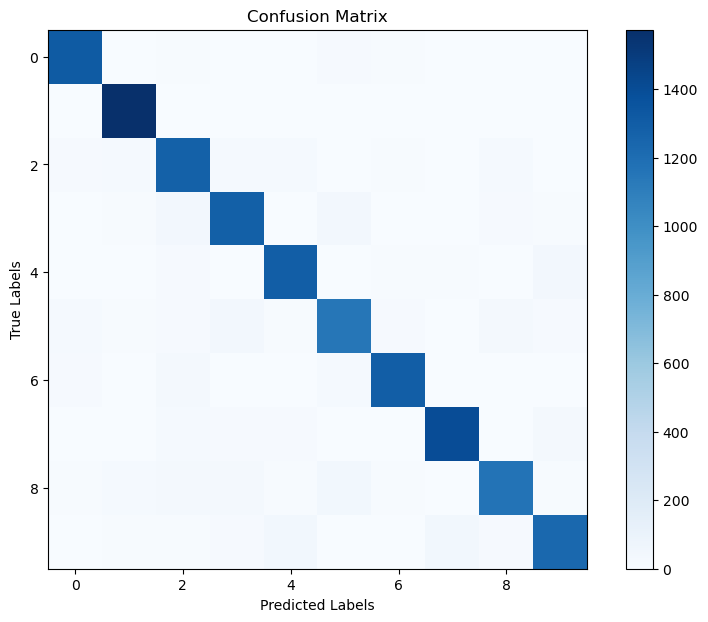

In [27]:
#Confusion matrix & Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()

In [78]:
#Actual and Predicted 
df = pd.DataFrame({'Actual Label': y_test[:100], 'Predicted Label': y_pred[:100]})
df.head(10)

,Actual Label,Predicted Label
15832,9,7
51882,1,1
20462,9,9
44261,9,5
59543,4,4
14220,4,4
3529,0,0
63446,0,0
10115,8,8
21879,9,9


Predicted Digit: 8


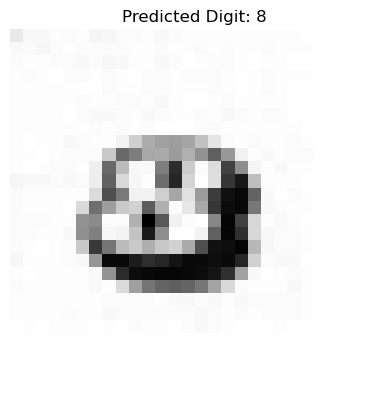

In [54]:
#Classify new images
image_path = 'eight.jpg'
image = Image.open(image_path)

#Resize the image to 28x28 
image = image.resize((28, 28))

#Convert to grayscale
image = image.convert('L')

#Flatten the image into a 1D array
image_array = np.array(image).reshape(1, -1)

scaler = StandardScaler()
image_array = scaler.fit_transform(image_array)

predicted_digit = svm_classifier.predict(image_array)[0]
print(f"Predicted Digit: {predicted_digit}")

plt.imshow(np.array(image), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()

Image: six.png, Predicted Digit: 8


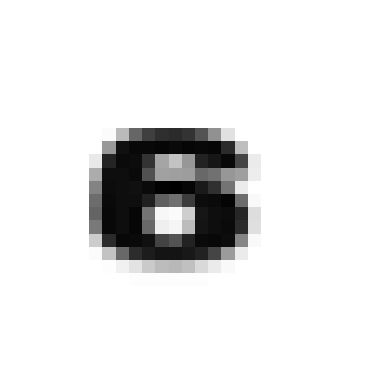

Image: four.png, Predicted Digit: 8


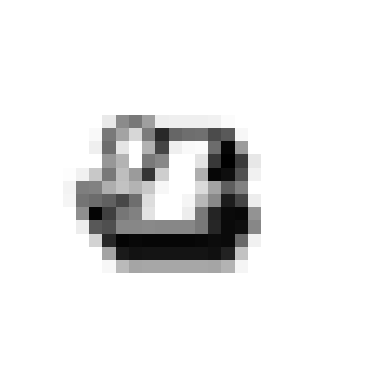

Image: eight.jpg, Predicted Digit: 8


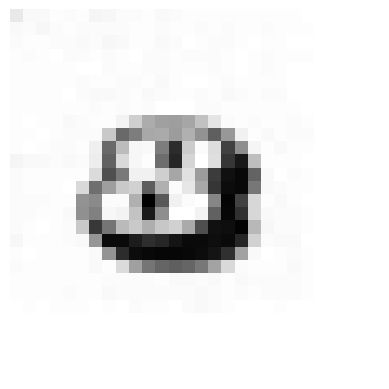

In [62]:
#In Bulk!
folder_path = '../data/numbers'

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image = image.resize((28, 28)).convert('L')
        image_array = np.array(image).reshape(1, -1)
        scaler = StandardScaler()
        image_array = scaler.fit_transform(image_array)
        predicted_digit = svm_classifier.predict(image_array)[0]
        print(f"Image: {filename}, Predicted Digit: {predicted_digit}")
        plt.imshow(np.array(image), cmap='gray')
        plt.axis('off')
        plt.show()